# Wahrscheinlichkeitsverteilungen Übersicht

## Diskrete Verteilungen 

### Bernoulliverteilung

Durchführung eines Bernoulli-Experiments, welches die zwei Ergebnisse Misserfolg (0) bzw. Erfolg (1) besitzt

**Wahrscheinlichkeitsfunktion (probabillity mass function):**

$f (x) = \left\{
\begin{array}{ll}
p^{x}\cdot(1-p)^{(1-x)}&, \ x = 0, \ 1 \\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $

In [1]:
from scipy.stats import bernoulli
import numpy as np

p = 0.6
b  = bernoulli(p)

In [2]:
b.pmf(0), b.pmf(1)

(0.4, 0.6)

In [3]:
x = np.arange(-0.5, 2, 0.5)
bernoulli = np.array(b.pmf(x))

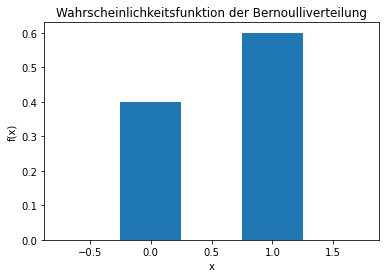

In [4]:
from matplotlib import pyplot as plt

plt.bar(x, bernoulli, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der Bernoulliverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = p$

In [5]:
b.expect()

0.6

**Varianz:**

*allgemein:* $Var(X) = E(x^{2})-(E(x))^{2}$

$Var(X)=p\cdot(1-p)$

In [6]:
b.var()

0.24

**Standardabweichung:**

*allgemein:* $\sigma = \sqrt{Var(X)}$

$\sigma = \sqrt{p\cdot(1-p)}$

In [7]:
b.std()

0.4898979485566356

**Vereilungsfunktion (cumulative distribution function):**

$F_{X}(x) = P(X \le x)$

$F_{X}(x) = \left\{
\begin{array}{ll}
0 &, \ x < 0 \\
1-p &, \ 0 \le x \le 1 \\
1 &, \ x \ge 1 \\
\end{array}
\right. $

In [8]:
x = np.arange(-0.5, 2, 0.001)
bernoulli = np.array(b.cdf(x))

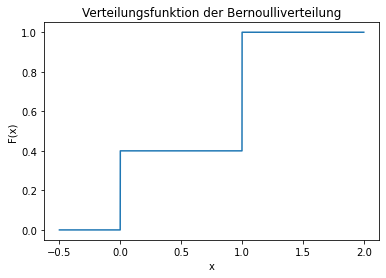

In [9]:
plt.plot(x, bernoulli)
plt.title("Verteilungsfunktion der Bernoulliverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Binomialverteilung

Durchführung von *n-mal* unabhängigen *Bernoulli-Experimenten*

**Wahrscheinlichkeitsfunktion:**

$B_{p, \ n}(k)= \left\{
\begin{array}{ll}
\binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}  &, \  0 \le k \le n\\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $

In [10]:
from scipy.stats import binom

n = 10
p = 0.5

k = np.arange(0, n+1)
bino = np.array(binom.pmf(k, n, p))

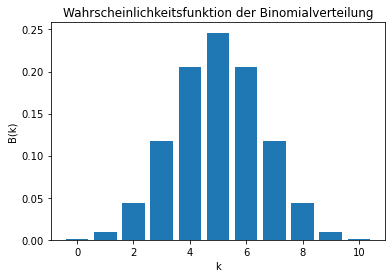

In [11]:
plt.bar(k, bino)
plt.title("Wahrscheinlichkeitsfunktion der Binomialverteilung")
plt.xlabel("k")
plt.ylabel("B(k)")
plt.show()

**Erwartungswert:**

$E(X) = n \cdot p$

In [12]:
bino = binom(n, p)
bino.expect()

5.000000000000005

**Varianz:**

$Var(X) = n \cdot p \cdot (1-p)$

In [13]:
bino.var()

2.5

**Standardabweichung:**

$\sigma = \frac{\sqrt{n}}{2}$

In [14]:
bino.std()

1.5811388300841898

**Verteilungsfunktion:**

$F_{X}(x)= \sum_{k=0}^{|x|} \binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}$

In [15]:
k = np.arange(0, n+1, 0.001)
bino = np.array(binom.cdf(k, n, p))

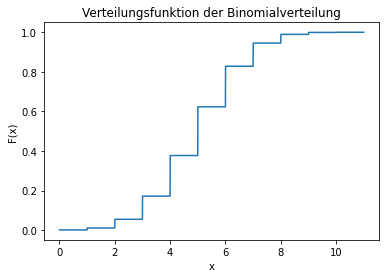

In [16]:
plt.plot(k, bino)
plt.title("Verteilungsfunktion der Binomialverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Poissonverteilung

Durchführung von *n-mal* unabhängigen *Bernoulli-Experimenten*, welche in einem zeitlichen oder räumlichen Beobachtungsintervall stattfinden 

**Wahrscheinlichkeitsfunktion:**

$P_{\lambda}(k)=\frac{\lambda^{k}}{k!}e^{-\lambda}$ mit $\lambda = n \cdot p_{n}$

In [17]:
from scipy.stats import poisson

lam = 5
n = 12

k = np.arange(0, n+1)
poi = np.array(poisson.pmf(k, lam))

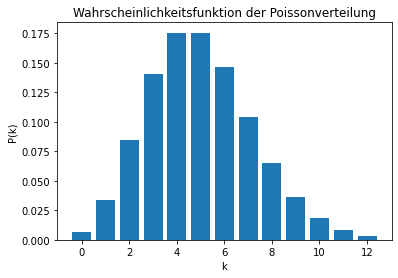

In [18]:
plt.bar(k, poi)
plt.title("Wahrscheinlichkeitsfunktion der Poissonverteilung")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.show()

**Erwartungswert:**

$E(X)=\lambda$

In [19]:
poi = poisson(lam)
poi.expect()

4.9999999999999964

**Varianz:**

$Var(X)=\lambda$

In [20]:
poi.var()

5.0

**Standartabweichung:**

$\sigma = \sqrt{\lambda}$

In [21]:
poi.std()

2.23606797749979

**Verteilungsfunktion:**

$F_{\lambda}(n)=\sum_{k=0}^{n}P_{\lambda}(k) = p_{n}$

In [22]:
k = np.arange(0, n+1, 0.001)
poi = np.array(poisson.cdf(k, lam))

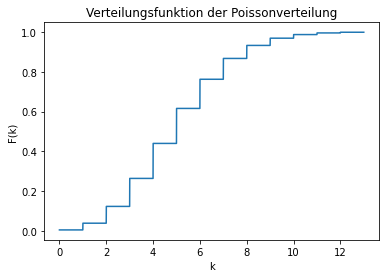

In [23]:
plt.plot(k, poi)
plt.title("Verteilungsfunktion der Poissonverteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Negative Binomialverteilung

Duchführung von *n-mal* unabhängige *Bernoulli-Experimente*, sodass *r* Versuche erfolgreich sind

**Wahrscheinlichkeitsfunktion:**

$\overline{B}_{r,\ p}(k) = \binom{r+k-1}{k} \cdot p^{r} \cdot (1-p)^{r} = \binom{-r}{k}+p^{r} \cdot (1-p)^{k}$

In [24]:
from  scipy.stats import nbinom

n = 5
r = 0.4
p = 0.4

k = np.arange(0, n+1)
nbino = np.array(nbinom.pmf(k, r, p))

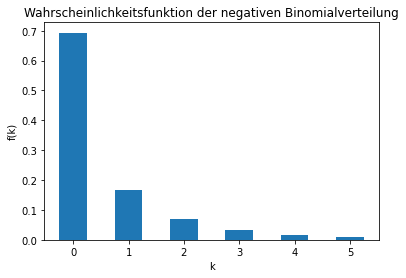

In [25]:
plt.bar(k, nbino, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der negativen Binomialverteilung")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.show()

**Erwartungswert:**

$E(X)=\frac{r \ \cdot \ (1-p)}{p}$

In [26]:
nbino = nbinom(r,p)
nbino.expect()

0.6

**Varianz:**

$Var(X)=\frac{r \ \cdot \ (1-p)}{p^{2}}$

In [27]:
nbino.var()

1.5000000000000002

**Standardabweichung:**

$\sigma=\frac{\sqrt{r \ \cdot \ (1-p)}}{p}$

In [28]:
nbino.std()

1.2247448713915892

**Verteilungsfunktion:**

$F_{r, \ p}(k) = \sum_{k = 0}^{\infty}\binom{-r}{k} \cdot p^{r} \cdot (1-p)^{k}$

In [29]:
k = np.arange(0, n+1, 0.001)
nbino = np.array(nbinom.cdf(k, r, p))

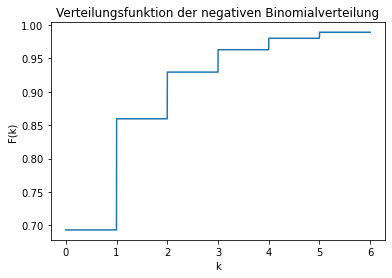

In [30]:
plt.plot(k, nbino)
plt.title("Verteilungsfunktion der negativen Binomialverteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Geometrische Verteilung

Spezialfall der *negativen Binomialverteilung*: *n-malige* Wiederholung von unabhängigen *Bernouli-Experimenten* bis der erste Versuch erfolgreich ist

**Wahrscheinlichkeitsfunktion:**

$\overline{B}_{1,\ p}(k)=G_{p}(k)= p \cdot (1-p)^{k}$

In [31]:
from scipy.stats import geom

p = 0.5
n = 6

k = np.arange(1, n+1)
geo = np.array(geom.pmf(k, p))

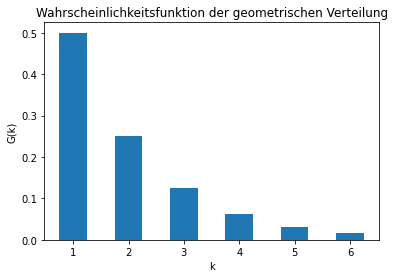

In [32]:
plt.bar(k, geo, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der geometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("G(k)")
plt.show()

**Erwartungswert:**

$E(X)= \frac{1}{p}$

In [33]:
geo = geom(p)
geo.expect()

2.0

**Varianz:**

$Var(X) = \frac{1-p}{p^{2}}$

In [34]:
geo.var()

2.0

**Standardabweichung:**

$\sigma = \frac{\sqrt{1-p}}{p}$

In [35]:
geo.std()

1.4142135623730951

**Verteilungsfunktion:**

$F_{p}(k) = \sum_{i=1}^{k}p \cdot (1-p)^{i-1} = 1-(1-p)^{k}$

In [36]:
k = np.arange(1, n+1, 0.001)
geo = np.array(geom.cdf(k, p))

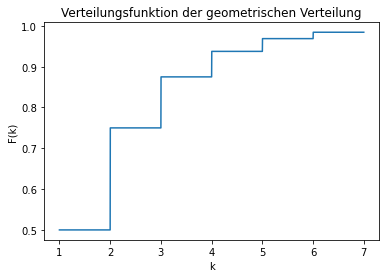

In [37]:
plt.plot(k, geo)
plt.title("Verteilungsfunktion der geometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Hypergeometrische Verteilung

Durchführung einer Stichprobe von *n* Elementen, durch ziehen ohne Zurücklegen gibt Auskunft über bestimmte Anzahl *k* von gezogenen Elementen

**Wahrscheinlichkeitsverteilung:**

$h_{M, n, N}(k) = \frac{\binom{M}{k} \binom{N-M}{n-k}}{\binom{N}{n}}$

In [38]:
from scipy.stats import hypergeom

[M, n, N] = [20, 7, 12]

k = np.arange(0, n+1)
hypergeo = np.array(hypergeom.pmf(k, M, n, N))

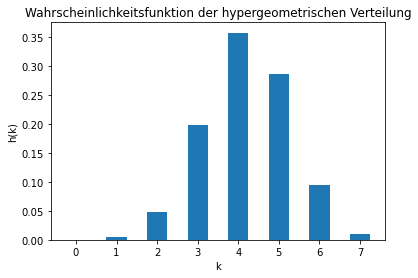

In [39]:
plt.bar(k, hypergeo, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der hypergeometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("h(k)")
plt.show()

**Erwartungswert:**

$E(X) = n \cdot \frac{M}{N}$

In [40]:
hypergeo = hypergeom(M, n, N)
hypergeo.expect()

4.199999999999995

**Varianz:**

$Var(X) = n \cdot \frac{M}{N} \cdot (1- \frac{M}{N}) \cdot \frac{N-n}{N-1}$

In [41]:
hypergeo.var()

1.1494736842105264

**Verteilungsfunktion:**

$H_{M, n, M}(k) = \sum_{i = 0}^{k} \frac{\binom{M}{i} \cdot \binom{N-M}{n-y}}{\binom{N}{n}}$

In [42]:
k = np.arange(0, n+1, 0.001)
geo = np.array(hypergeom.cdf(k, M, n, N))

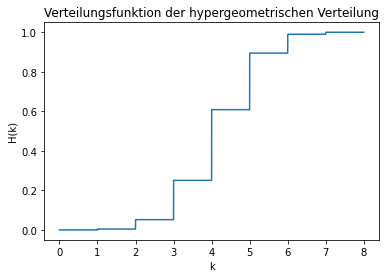

In [43]:
plt.plot(k, geo)
plt.title("Verteilungsfunktion der hypergeometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("H(k)")
plt.show()